# Lab 01 Tasks 

## Task 1

The Python dictionary below stores details of Twitter follower relations for a set of 6 Twitter users. Each key is a Twitter username **X** and the corresponding list indicates the names of other users who follow the user **X**.

Based on this data, construct an appropriate network using NetworkX, and identify: 

- The total number of nodes and edges in the network.
- All edges in the network that are *reciprocated*.

In [1]:
twitter_data = {'@alice88': ['@amara2000', '@freya_ie', '@sydney'],
    '@amara2000': ['@freya_ie', '@alice88', '@dobrien', '@marcjones'],
    '@dobrien': ['@marcjones', '@alice88'],
    '@freya_ie': ['@sydney'],
    '@marcjones': ['@freya_ie', '@alice88', '@amara2000', '@dobrien'],
    '@sydney': ['@alice88']}

In [2]:
import networkx as nx
g = nx.DiGraph()

In [3]:
for x in twitter_data:
    g.add_node(x)
    for f in twitter_data[x]:
        g.add_edge(x, f)

In [4]:
g.number_of_nodes(), g.number_of_edges()

(6, 15)

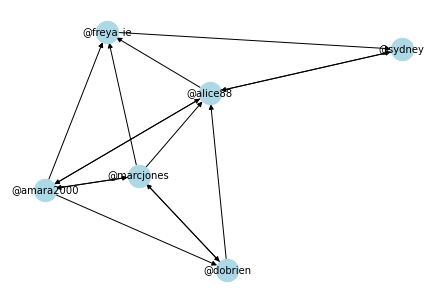

In [5]:
nx.draw(g, with_labels=True, font_size=10, node_size=500, node_color="lightblue")

In [6]:
# check which edges are reciprocated
# there are a few ways to do this, one way is to check each unique pair of nodes to see if edges exist in both directions
import itertools
for pair in itertools.combinations(twitter_data.keys(), r=2):
    # do edges exist in both directions?
    if g.has_edge(pair[0], pair[1]) and g.has_edge(pair[1], pair[0]):
        print(pair)

('@alice88', '@amara2000')
('@alice88', '@sydney')
('@amara2000', '@marcjones')
('@dobrien', '@marcjones')


## Task 2

The Python dictionary below records meeting attendances for team members of a research group across an 8 week period. 

Based on this data, construct an appropriate weighted *co-presence* network, and identify: 

- The total number of nodes and edges in the network.
- The edge(s) with the highest weight in the network.

In [7]:
meeting_data = {'week1': ['bob', 'alice', 'oliver', 'justin'],
    'week2': ['maria', 'tanya', 'justin', 'bob', 'oliver'],
    'week3': ['lara', 'tanya', 'maria', 'justin'],
    'week4': ['justin', 'bob', 'tanya'],
    'week5': ['alice', 'tanya', 'lara', 'bob', 'justin'],
    'week6': ['oliver', 'maria', 'lara'],
    'week7': ['tanya', 'justin', 'bob'],
    'week8': ['maria', 'tanya', 'bob']}

In [8]:
g2 = nx.Graph()

In [9]:
for week in meeting_data:
    # get all unique pairs of individuals from this meeting:
    for pair in itertools.combinations(meeting_data[week], r=2):
        # do we have the edge already? if so, increment the weight on the edge:
        if g2.has_edge(pair[0], pair[1]):
            g2[pair[0]][pair[1]]["weight"] += 1
        # otherwise create a new edge with a weight of 1:
        else:
            g2.add_edge(pair[0], pair[1], weight=1)

In [10]:
g2.number_of_nodes(), g2.number_of_edges()

(7, 20)

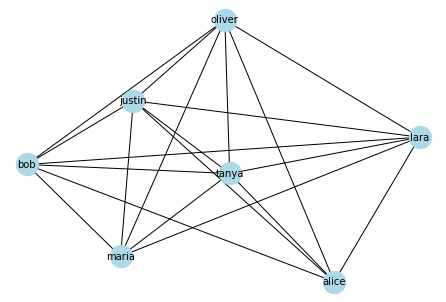

In [11]:
nx.draw(g2, with_labels=True, font_size=10, node_size=500, node_color="lightblue")

## Task 3

Based on the weighted co-presence network constructed in Task 2, perform the following:

- Create a new unweighted network by apply thresholding to the edge weights, for a threshold value *t=3*. How many nodes and edges are in the resulting network?
- Identify any *isolated* nodes which now exist in the new unweighted network.

In [12]:
g3 = nx.Graph()

for node in g2.nodes():
    g3.add_node(node)

In [14]:
# iterate over the older network, to decide if we want to keep the edges:
for edge in g2.edges(data=True):
    # does the edge weight reach the threshold?
    if edge[2]["weight"] >= 3:
        g3.add_edge(edge[0], edge[1])

In [15]:
g3.number_of_nodes(), g3.number_of_edges()

(7, 4)

In [16]:
# any isolated? i.e. have no neighbors?
for node in g3.nodes():
    neighbors = list(g3.neighbors(node))
    if len(neighbors) == 0:
        print(node)

alice
oliver
lara


In [17]:
# NetworkX also provides a quick way of doing this
list(nx.isolates(g3))

['alice', 'oliver', 'lara']